<a href="https://colab.research.google.com/github/zanecoder/mortReporting/blob/main/Feb22Sandbox_1_0_ChadsReports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import six
import pytz

In [ ]:
master = pd.read_csv("/content/Report.csv", header=1)
master = master[1:][:]
master.fillna(0, inplace=True)
master

,Rate Locked Date,Registered Date,Processing Date,Funded Date,Loan Shipped Date,Loan Sold Date,Loan Amount,Lender Account Executive Name,Loan Channel,Loan Number,Loan Type,# Of Rate Re-Locks On File
1,1/3/2022,12/27/2021,12/30/2021,0,0,0,"$395,650.00",Steve Duke,Wholesale,W2112383,FHA,0
2,1/7/2022,1/7/2022,1/10/2022,0,0,0,"$132,000.00",Charlie Nager,Wholesale,W2201081,Conventional,0
3,1/19/2022,1/19/2022,1/20/2022,0,0,0,"$227,500.00",David Knutson,Wholesale,W2201223,Conventional,0
4,1/28/2022,1/28/2022,2/1/2022,0,0,0,"$647,200.00",David Knutson,Wholesale,W2201345,Conventional,0
5,0,0,0,0,0,0,"$252,000.00",David Knutson,Wholesale,W2202022,Conventional,0
6,12/28/2021,12/28/2021,12/28/2021,0,0,0,"$483,693.00",David Knutson,Wholesale,W2109148,Conventional,0
7,1/13/2022,1/13/2022,1/14/2022,0,0,0,"$120,000.00",Charlie Nager,Wholesale,W2201158,Conventional,0
8,1/14/2022,1/14/2022,1/18/2022,0,0,0,"$191,000.00",Greg Ettinger,Wholesale,W2201164,Conventional,0
9,1/26/2022,1/26/2022,1/28/2022,0,0,0,"$384,625.00",Greg Ettinger,Wholesale,W2201302,Conventional,0
10,1/26/2022,1/26/2022,1/27/2022,0,0,0,"$348,000.00",Charlie Nager,Wholesale,W2201309,Conventional,0


In [ ]:
master.dtypes

Rate Locked Date                 object
Registered Date                  object
Processing Date                  object
Funded Date                      object
Loan Shipped Date                object
Loan Sold Date                    int64
Loan Amount                      object
Lender Account Executive Name    object
Loan Channel                     object
Loan Number                      object
Loan Type                        object
# Of Rate Re-Locks On File       object
dtype: object

In [ ]:
master['Loan Amount'] = master['Loan Amount'].replace('[\$,]', '', regex=True)
master['# Of Rate Re-Locks On File'] = pd.to_numeric(master['# Of Rate Re-Locks On File'])
master['Loan Amount'] = pd.to_numeric(master['Loan Amount'])
master['Rate Locked Date'] = pd.to_datetime(master['Rate Locked Date'])
master['Registered Date'] = pd.to_datetime(master['Registered Date'])
master['Processing Date'] = pd.to_datetime(master['Processing Date'])
master['Funded Date'] = pd.to_datetime(master['Funded Date'])
master['Loan Shipped Date'] = pd.to_datetime(master['Loan Shipped Date'])
master['Loan Sold Date'] = pd.to_datetime(master['Loan Sold Date'])
master['Loan Channel'] = master['Loan Channel'].astype('string')
master['Lender Account Executive Name'] = master['Lender Account Executive Name'].astype('string')
master['Loan Number'] = master['Loan Number'].astype('string')
master['Loan Type'] = master['Loan Type'].astype('string')

**ENTER START AND END DATES, & HOLIDAYS**


In [ ]:
start_of_period = "2022-02-01"
end_of_period = "2022-02-28"
holidays = pd.to_datetime(["2022-01-17","2022-02-21","2022-05-30", "2022-06-20","2022-07-04","2022-09-05","2022-10-10","2022-11-11","2022-11-24","2022-12-26"])

no_of_days = pd.to_numeric(end_of_period.split('-')[-1])

Dates = pd.to_datetime(pd.date_range(start=start_of_period,end=end_of_period))

raw = {
   "Dates": Dates,
    "Locked": [0] * no_of_days, 
    "Registered": [0] * no_of_days, 
    "Processing": [0] * no_of_days, 
    "Funded":[0] * no_of_days, 
    "Shipped":[0] * no_of_days, 
    "Sold":[0] * no_of_days, 
    "Locked $$$": [0] * no_of_days, 
    "Registered $$$": [0] * no_of_days,  
    "Processing $$$": [0] * no_of_days,  
    "Funded $$$":[0] * no_of_days, 
    "Shipped $$$":[0] * no_of_days,  
    "Sold $$$":[0] * no_of_days  
}

feb_running_tabulations = pd.DataFrame(raw)
feb_running_tabulations["Business Day"] = feb_running_tabulations["Dates"].dt.weekday <= 4
for hol in holidays:
  feb_running_tabulations.loc[feb_running_tabulations['Dates'] == hol, 'Business Day'] = False  


In [ ]:
feb_running_tabulations["BD Numeric"] = 0

for idx_date, date in feb_running_tabulations["Dates"].iteritems():
  if ( (date <= pd.to_datetime(datetime.strftime(datetime.now(timezone(timedelta(hours=-8))), '%Y-%m-%d'))) and (feb_running_tabulations.iloc[idx_date, 13] == True) ):  #datetime.today(
    feb_running_tabulations.iloc[idx_date, 14] = 1
  else:
    feb_running_tabulations.iloc[idx_date, 14] = 0

In [ ]:
for idx_date,date in feb_running_tabulations["Dates"].iteritems():


  for idx_master_date,master_date in master["Rate Locked Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),1] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),7] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values


  for idx_master_date,master_date in master["Registered Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),2] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),8] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values

  for idx_master_date,master_date in master["Processing Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),3] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),9] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values


  for idx_master_date,master_date in master["Funded Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),4] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),10] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values

  for idx_master_date,master_date in master["Loan Shipped Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),5] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),11] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values

  for idx_master_date,master_date in master["Loan Sold Date"].iteritems():
    if date == master_date:
      feb_running_tabulations.iloc[(idx_date),6] += 1 #updating the Locked count
      feb_running_tabulations.iloc[(idx_date),12] += master.iloc[(idx_master_date-1),6] #updating the locked $$ values

In [ ]:
feb_running_tabulations

,Dates,Locked,Registered,Processing,Funded,Shipped,Sold,Locked $$$,Registered $$$,Processing $$$,Funded $$$,Shipped $$$,Sold $$$,Business Day,BD Numeric
0,2022-02-01,3,4,9,2,2,0,759900,1140616,3783600,249850,451100,0,True,1
1,2022-02-02,0,0,0,0,0,0,0,0,0,0,0,0,True,1
2,2022-02-03,0,0,0,0,0,0,0,0,0,0,0,0,True,0
3,2022-02-04,0,0,0,0,0,0,0,0,0,0,0,0,True,0
4,2022-02-05,0,0,0,0,0,0,0,0,0,0,0,0,False,0
5,2022-02-06,0,0,0,0,0,0,0,0,0,0,0,0,False,0
6,2022-02-07,0,0,0,0,0,0,0,0,0,0,0,0,True,0
7,2022-02-08,0,0,0,0,0,0,0,0,0,0,0,0,True,0
8,2022-02-09,0,0,0,0,0,0,0,0,0,0,0,0,True,0
9,2022-02-10,0,0,0,0,0,0,0,0,0,0,0,0,True,0


In [ ]:

feb_running_tabulations = feb_running_tabulations.drop("Business Day", axis=1)
feb_running_tabulations.set_index('Dates', inplace = True)

In [ ]:
feb_running_tabulations.loc["Total"] = feb_running_tabulations.sum() #Creating the 'Total' row

In [ ]:
no_of_bus_days =feb_running_tabulations.loc['Total']['BD Numeric'] #getting the total number of business days, as the total of BD Numeric Column

feb_running_tabulations.loc['Average'] = feb_running_tabulations.loc["Total"]/no_of_bus_days #creating the 'Average' row


In [ ]:
feb_running_tabulations['Locked $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Locked $$$']]
feb_running_tabulations['Registered $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Registered $$$']]
feb_running_tabulations['Processing $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Processing $$$']]
feb_running_tabulations['Funded $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Funded $$$']]
feb_running_tabulations['Shipped $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Shipped $$$']]
feb_running_tabulations['Sold $$$'] = ['${:,.2f}'.format(x) for x in feb_running_tabulations['Sold $$$']]


In [ ]:
feb_running_tabulations = feb_running_tabulations.drop("BD Numeric", axis=1) #dropping the business bd counter

In [ ]:
feb_running_tabulations

,Locked,Registered,Processing,Funded,Shipped,Sold,Locked $$$,Registered $$$,Processing $$$,Funded $$$,Shipped $$$,Sold $$$
Dates,,,,,,,,,,,,
2022-02-01 00:00:00,3.0,4.0,9.0,2.0,2.0,0.0,"$759,900.00","$1,140,616.00","$3,783,600.00","$249,850.00","$451,100.00",$0.00
2022-02-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-03 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-05 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
2022-02-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


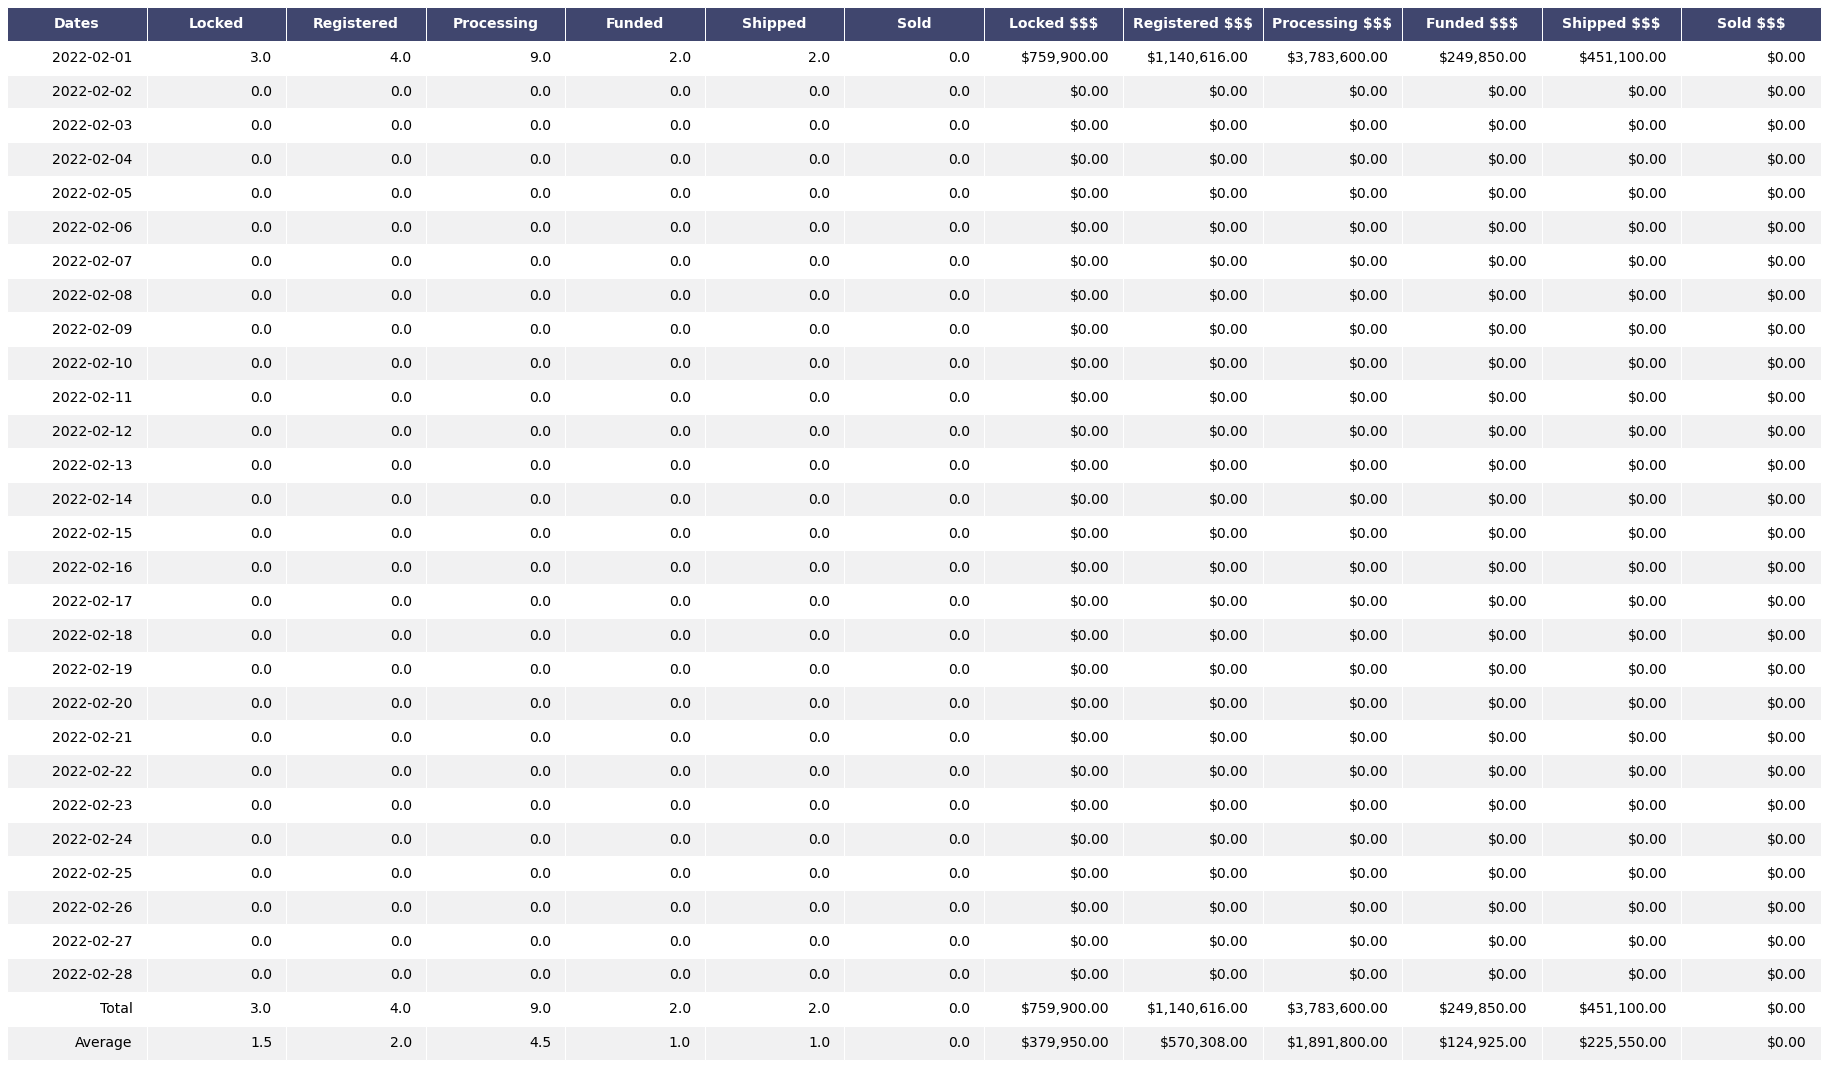

In [ ]:
version_2 = feb_running_tabulations.reset_index()
version_2['Dates'][:-2] = pd.to_datetime(version_2['Dates'][:-2]).dt.date
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(version_2, header_columns=0, col_width=2.5)

In [ ]:
no_of_bus_days

2

In [ ]:
feb_running_tabulations.loc['Total']

Locked                      3.0
Registered                  4.0
Processing                  9.0
Funded                      2.0
Shipped                     2.0
Sold                        0.0
Locked $$$          $759,900.00
Registered $$$    $1,140,616.00
Processing $$$    $3,783,600.00
Funded $$$          $249,850.00
Shipped $$$         $451,100.00
Sold $$$                  $0.00
Name: Total, dtype: object

In [ ]:
pd.to_datetime(datetime.strftime(datetime.now(timezone(timedelta(hours=-8))), '%Y-%m-%d'))

Timestamp('2022-02-02 00:00:00')